In [28]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(font_scale = 1.6)

In [12]:
from smart_open import open

with open('https://raw.githubusercontent.com/lambdal/deeplearning-benchmark/master/pytorch/pytorch-train-throughput-fp32.csv') as f:
    df_32 = pd.read_csv(f).set_index('name_gpu')
with open('https://raw.githubusercontent.com/lambdal/deeplearning-benchmark/master/pytorch/pytorch-train-throughput-fp16.csv') as f:
    df_16 = pd.read_csv(f).set_index('name_gpu')
df_16.drop(['num_gpu', 'watt', 'price'], axis=1, inplace=True)
df_all = df_32.join(df_16, lsuffix='_32', rsuffix='_16') 
df_all

,num_gpu,watt,price,ssd_32,bert_base_squad_32,bert_large_squad_32,gnmt_32,maskrcnn_32,resnet50_32,tacotron2_32,...,ssd_16,bert_base_squad_16,bert_large_squad_16,gnmt_16,maskrcnn_16,resnet50_16,tacotron2_16,transformerxlbase_16,transformerxllarge_16,waveglow_16
name_gpu,,,,,,,,,,,,,,,,,,,,,
V100 32GB,1.0,250.0,11357.0,136.0,42.0,12.0,22743.0,10.0,368.0,17604.0,...,224.0,148.0,49.0,81625.0,14.0,828.0,27249.0,10348.0,4372.0,100553.0
Quadro RTX 8000,1.0,260.0,6900.0,116.0,38.0,11.0,21808.0,10.0,300.0,10016.0,...,180.0,124.0,41.0,77458.0,11.0,646.0,31664.0,9290.0,4109.0,92695.0
Quadro RTX 8000 V1,1.0,260.0,6900.0,76.0,40.0,11.0,21923.0,8.0,260.0,15908.0,...,156.0,158.0,50.0,86629.0,12.0,592.0,17675.0,17113.0,7775.0,38845.0
Quadro RTX 6000,1.0,260.0,4964.0,118.0,38.0,10.0,21014.0,10.0,301.0,8954.0,...,179.0,121.0,39.0,71300.0,12.0,645.0,25203.0,8605.0,3481.0,78139.0
Quadro RTX 5000,1.0,230.0,2392.0,83.0,26.0,6.0,14320.0,7.0,213.0,6841.0,...,126.0,86.0,25.0,37135.0,9.0,439.0,15410.0,6085.0,979.0,51401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4x RTX A4500,4.0,800.0,7712.0,393.0,206.0,37.0,108391.0,43.0,1335.0,52420.0,...,670.0,504.0,127.0,218320.0,48.0,2376.0,51248.0,58324.0,18083.0,267809.0
8x RTX A4500,8.0,1600.0,15424.0,791.0,374.0,64.0,194500.0,84.0,2672.0,104627.0,...,1348.0,969.0,408.0,412022.0,88.0,4733.0,100119.0,117656.0,36436.0,456470.0
2x RTX A5500,2.0,460.0,9000.0,242.0,146.0,33.0,76639.0,28.0,828.0,38915.0,...,424.0,342.0,98.0,168002.0,30.0,1453.0,38880.0,40865.0,14921.0,171268.0


In [13]:
print(df_all.index.unique())

Index(['V100 32GB', 'Quadro RTX 8000', 'Quadro RTX 8000 V1', 'Quadro RTX 6000',
       'Quadro RTX 5000', 'Titan RTX', 'RTX 2080Ti', 'GTX 1080Ti',
       'RTX 2080 SUPER MAX-Q', 'RTX 2080 MAX-Q', 'RTX 2070 MAX-Q', 'RTX 3070',
       'RTX 3080', 'RTX 3090', 'A100 40GB PCIe', 'A100 80GB PCIe',
       'A100 40GB SXM4', 'A100 80GB SXM4', 'RTX A6000', 'RTX A5000',
       'Lambda Cloud — RTX A6000', 'RTX 3080 Max-Q', 'RTX A40', 'RTX A4000',
       'RTX A4500', 'RTX A5500', '2x RTX 2080Ti NVLink', '2x RTX 2080Ti',
       '4x RTX 2080Ti NVLink', '4x RTX 2080Ti', '8x RTX 2080Ti NVLink',
       '8x RTX 2080Ti', '2x RTX Quadro 8000 NVLink', '2x RTX Quadro 8000',
       '4x RTX Quadro 8000 NVLink', '4x RTX Quadro 8000',
       '8x RTX Quadro 8000 NVLink', '8x RTX Quadro 8000', '2x V100 32GB',
       '4x V100 32GB', '8x V100 32GB', 'p3.16xlarge', 'p3.8xlarge',
       'Lambda Cloud — 8x V100 16GB', 'Lambda Cloud — 4x GTX 1080Ti',
       'Lambda Cloud — 2x Quadro RTX 6000',
       'Lambda Cloud — 4x 

name_gpu               p3.16xlarge  p3.8xlarge  p4d.24xlarge
bert_base_squad_16         1000.00      578.00       2616.00
bert_base_squad_32          277.00      145.00       1100.00
bert_large_squad_16         275.00      148.00        755.00
bert_large_squad_32          66.00       34.00        278.00
gnmt_16                  405186.00   208731.00    1479962.00
gnmt_32                  158037.00    80563.00     800172.00
hourly_cost                  24.48       12.24         32.77
maskrcnn_16                 102.00       52.00        136.00
maskrcnn_32                  75.00       40.00        161.00
num_gpu                       8.00        4.00          8.00
price                     85312.00    42656.00     116568.00
resnet50_16                6557.00     3293.00       9476.00
resnet50_32                2862.00     1441.00       6197.00
ssd_16                     1687.00      890.00       3129.00
ssd_32                     1071.00      544.00       1975.00
tacotron2_16            

,hourly_cost,tf_speedup_16,tf_speedup_32,cnn_speedup_16,cnn_speedup_32,tf_experiment_length_16,tf_experiment_length_32,cnn_experiment_length_16,cnn_experiment_length_32,tf_experiment_cost_16,tf_experiment_cost_32,cnn_experiment_cost_16,cnn_experiment_cost_32
name_gpu,,,,,,,,,,,,,
p3.16xlarge,24.48,1.951157,1.980445,1.970720,1.979259,36.901189,36.355472,36.534867,36.377246,903.341111,889.981948,894.373544,890.514970
p3.8xlarge,12.24,1.000000,1.000000,1.000000,1.000000,72.000000,72.000000,72.000000,72.000000,881.280000,881.280000,881.280000,881.280000
p4d.24xlarge,32.77,9.332669,9.383038,3.008501,4.115062,7.714835,7.673421,23.932187,17.496700,252.815130,251.458005,784.257782,573.366855


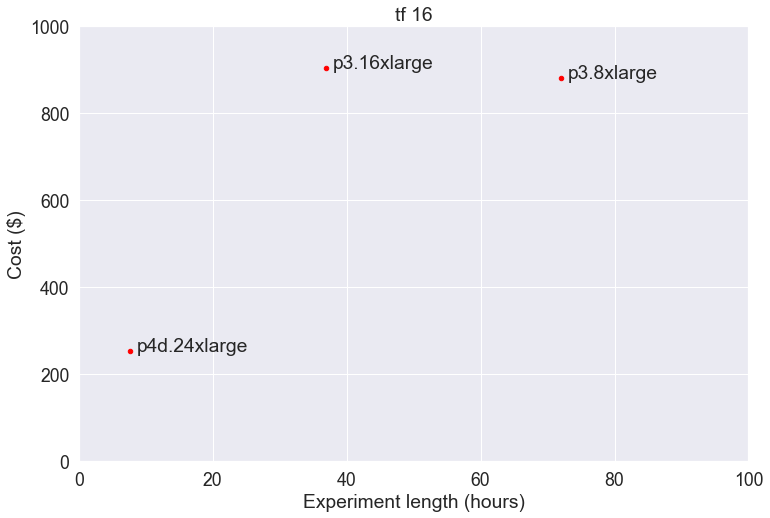

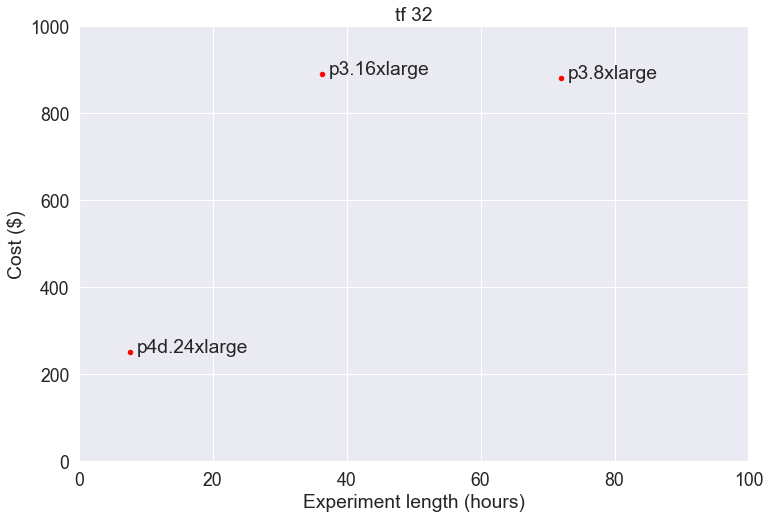

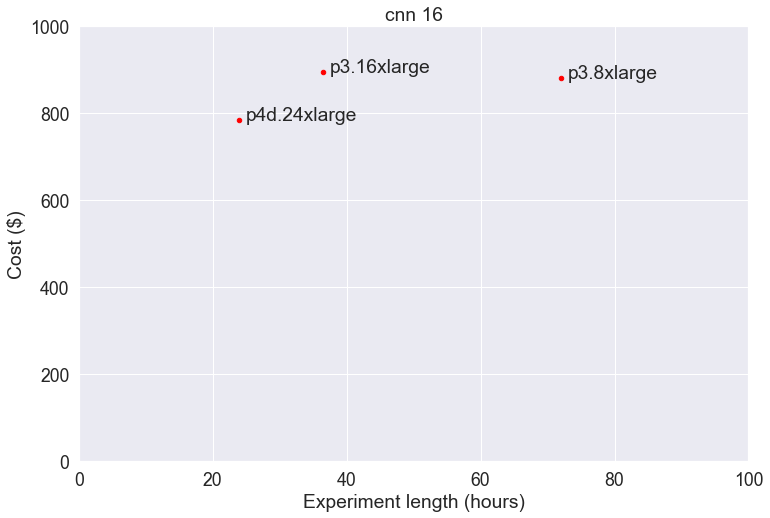

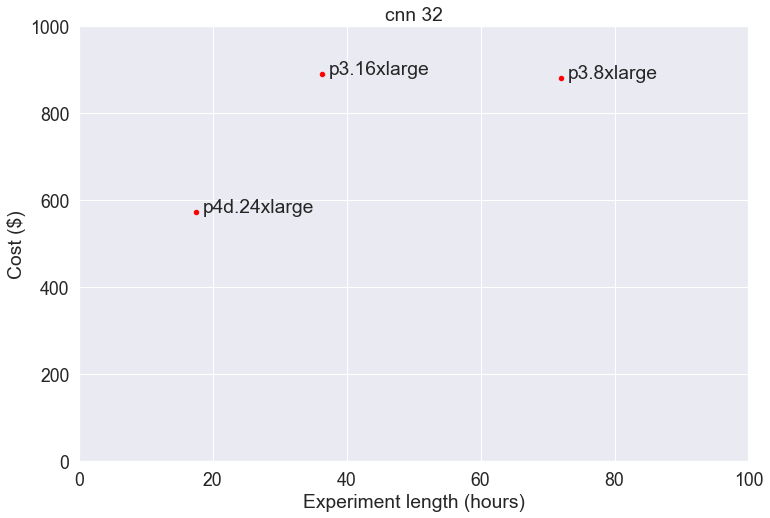

In [29]:
def cloud_benchmark_df(df: pd.DataFrame, hourly_cost: pd.Series, speedup_base: str, xlim=None, ylim=None) -> pd.DataFrame:
    hourly_cost.name = 'hourly_cost'
    df = df.join(hourly_cost).dropna()
    print(df.T.sort_index())

    for suffix in ['32', '16']:
        tf_benchmarks = [f'bert_base_squad_{suffix}', f'bert_large_squad_{suffix}', f'transformerxllarge_{suffix}', f'transformerxlbase_{suffix}']
        assert not (df[tf_benchmarks] == 0).any().any()
        df[f'tf_mean_{suffix}'] = df[tf_benchmarks].mean(axis=1)
        df[f'tf_speedup_{suffix}'] = df[f'tf_mean_{suffix}'] / df.loc[speedup_base, f'tf_mean_{suffix}']

        cnn_benchmarks = [f'maskrcnn_{suffix}', f'resnet50_{suffix}', f'ssd_{suffix}']
        assert not (df[cnn_benchmarks] == 0).any().any()
        df[f'cnn_mean_{suffix}'] = df[cnn_benchmarks].mean(axis=1)
        df[f'cnn_speedup_{suffix}'] = df[f'cnn_mean_{suffix}'] / df.loc[speedup_base, f'cnn_mean_{suffix}']

        experiment_length_at_base_speedup = 72  # hours
        df[f'tf_experiment_length_{suffix}'] = experiment_length_at_base_speedup / df[f'tf_speedup_{suffix}']
        df[f'cnn_experiment_length_{suffix}'] = experiment_length_at_base_speedup / df[f'cnn_speedup_{suffix}']

        df[f'tf_experiment_cost_{suffix}'] = df['hourly_cost'] * df[f'tf_experiment_length_{suffix}']
        df[f'cnn_experiment_cost_{suffix}'] = df['hourly_cost'] * df[f'cnn_experiment_length_{suffix}']
    
    def plot_df(df, prefix: str, suffix: str, xlim=xlim, ylim=ylim):
        fig, ax = plt.subplots(figsize=(12, 8))
        df.plot(y=f'{prefix}_experiment_cost_{suffix}', x=f'{prefix}_experiment_length_{suffix}', kind='scatter', ax=ax, c='red')
        ax.set_xlim(0, 100)
        if xlim is not None:
            ax.set_xlim(xlim)
        ax.set_xlabel('Experiment length (hours)')
        ax.set_ylim(0, 1000)
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_ylabel('Cost ($)')
        for k, v in df.iterrows():
            ax.annotate(k, (v[f'{prefix}_experiment_length_{suffix}'] + 1, v[f'{prefix}_experiment_cost_{suffix}']))#, fontsize=14)
        ax.set_title(f'{prefix} {suffix}')
        return fig

    df = df[['hourly_cost', 'tf_speedup_16', 'tf_speedup_32', 'cnn_speedup_16', 'cnn_speedup_32', 'tf_experiment_length_16', 'tf_experiment_length_32', 'cnn_experiment_length_16', 'cnn_experiment_length_32', 'tf_experiment_cost_16', 'tf_experiment_cost_32', 'cnn_experiment_cost_16', 'cnn_experiment_cost_32']]

    return df, plot_df(df, 'tf', '16'), plot_df(df, 'tf', '32'), plot_df(df, 'cnn', '16'), plot_df(df, 'cnn', '32')

df, fig1, fig2, fig3, fig4 = cloud_benchmark_df(
    df_all,
    pd.Series(
        [12.24, 24.48, 32.77],
        ['p3.8xlarge', 'p3.16xlarge', 'p4d.24xlarge']
    ),
    'p3.8xlarge'
)
df

name_gpu               4x V100 32GB  8x V100 32GB  8x A100 40GB PCIe
bert_base_squad_16            533.0         985.0             2153.0
bert_base_squad_32            156.0         304.0             1025.0
bert_large_squad_16           178.0         334.0              646.0
bert_large_squad_32            46.0          88.0              248.0
gnmt_16                    312281.0      609054.0          1239601.0
gnmt_32                     86930.0      171783.0           646381.0
hourly_cost                    12.0          24.0               32.0
maskrcnn_16                    51.0          92.0              126.0
maskrcnn_32                    38.0          74.0              159.0
num_gpu                         4.0           8.0                8.0
price                       45428.0       90856.0           102280.0
resnet50_16                  3293.0        6569.0             8344.0
resnet50_32                  1441.0        2862.0             5643.0
ssd_16                        858.

,hourly_cost,tf_speedup_16,tf_speedup_32,cnn_speedup_16,cnn_speedup_32,tf_experiment_length_16,tf_experiment_length_32,cnn_experiment_length_16,cnn_experiment_length_32,tf_experiment_cost_16,tf_experiment_cost_32,cnn_experiment_cost_16,cnn_experiment_cost_32
name_gpu,,,,,,,,,,,,,
4x V100 32GB,12.0,1.000000,1.000000,1.000000,1.000000,72.000000,72.000000,72.000000,72.000000,864.000000,864.000000,864.000000,864.000000
8x V100 32GB,24.0,1.980330,1.982408,1.955973,1.975670,36.357573,36.319463,36.810318,36.443327,872.581764,871.667117,883.447621,874.639859
8x A100 40GB PCIe,32.0,6.370549,7.180266,2.703713,3.786991,11.302010,10.027484,26.630050,19.012456,361.664304,320.879476,852.161605,608.398584


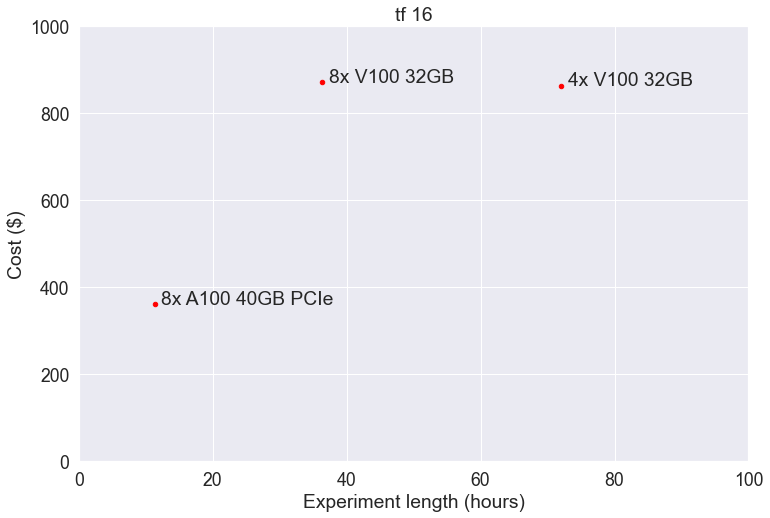

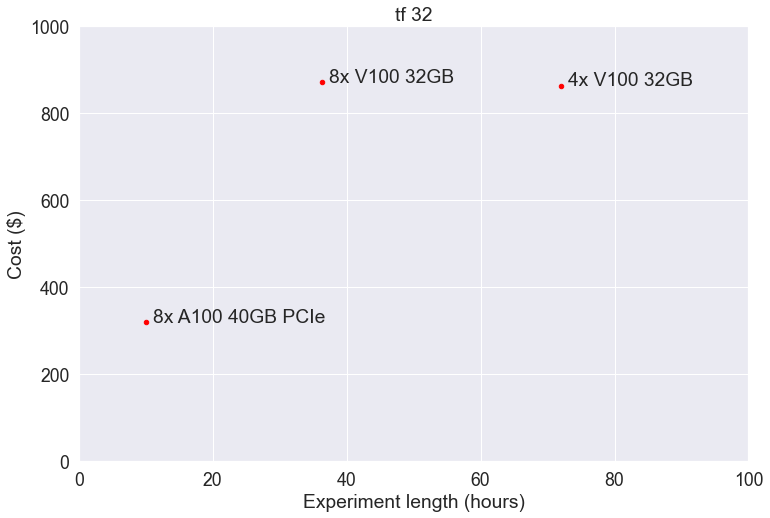

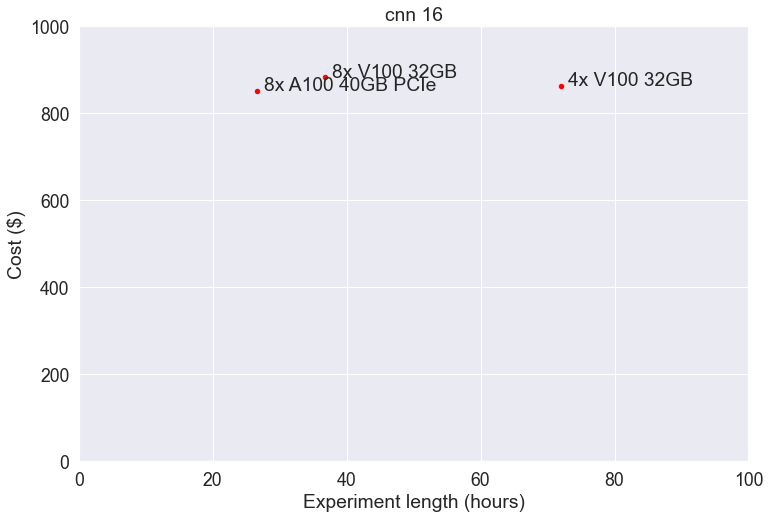

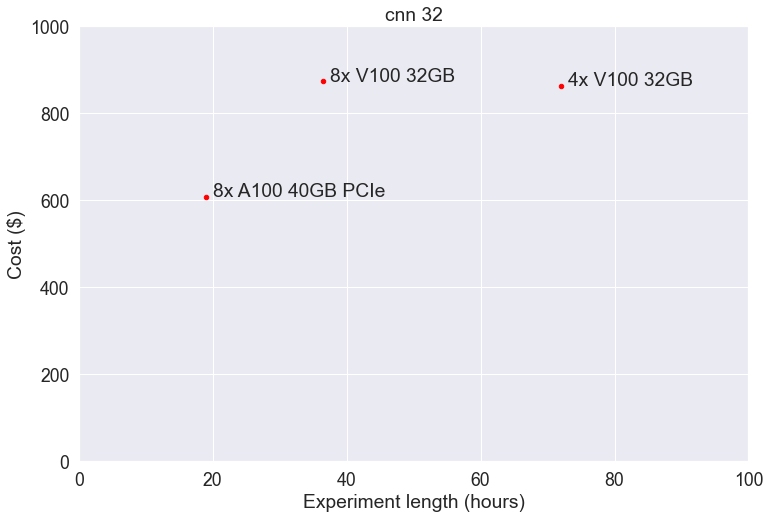

In [31]:
df, *_ = cloud_benchmark_df(
    df_all,
    pd.Series(
        [12, 24, 32],
        ['4x V100 32GB', '8x V100 32GB', '8x A100 40GB PCIe']
    ),
    '4x V100 32GB'
)
df

name_gpu               Lambda Cloud — 8x V100 16GB  4x A100 40GB PCIe  \
bert_base_squad_16                           952.0             1099.0   
bert_base_squad_32                           259.0              533.0   
bert_large_squad_16                          233.0              333.0   
bert_large_squad_32                           65.0              133.0   
gnmt_16                                   406589.0           654709.0   
gnmt_32                                   158279.0           338788.0   
hourly_cost                                    4.4                4.4   
maskrcnn_16                                   99.0               75.0   
maskrcnn_32                                   73.0               87.0   
num_gpu                                        8.0                4.0   
price                                      85312.0            51140.0   
resnet50_16                                 6861.0             4285.0   
resnet50_32                                 2882.0 

,hourly_cost,tf_speedup_16,tf_speedup_32,cnn_speedup_16,cnn_speedup_32,tf_experiment_length_16,tf_experiment_length_32,cnn_experiment_length_16,cnn_experiment_length_32,tf_experiment_cost_16,tf_experiment_cost_32,cnn_experiment_cost_16,cnn_experiment_cost_32
name_gpu,,,,,,,,,,,,,
Lambda Cloud — 8x V100 16GB,4.4,0.596275,0.705829,2.124263,1.816102,120.749600,102.007643,33.894102,39.645340,531.298241,448.833631,149.134049,174.439496
4x A100 40GB PCIe,4.4,1.276813,1.557383,1.488855,1.764867,56.390404,46.231403,48.359319,40.796267,248.117779,203.418172,212.781002,179.503577
Lambda Cloud — 4x RTX A6000,3.2,1.000000,1.000000,1.000000,1.000000,72.000000,72.000000,72.000000,72.000000,230.400000,230.400000,230.400000,230.400000


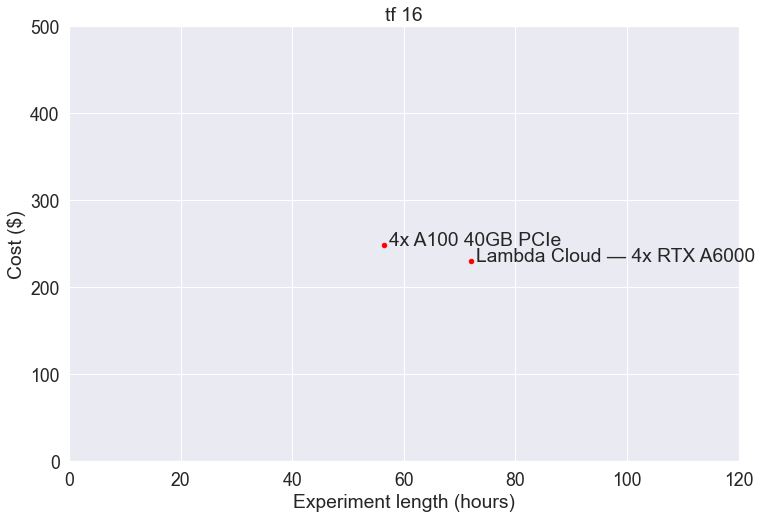

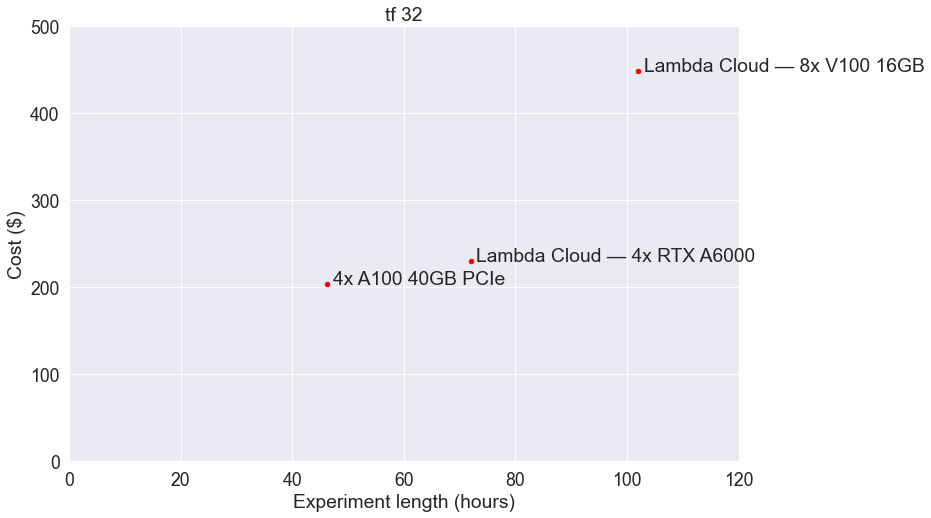

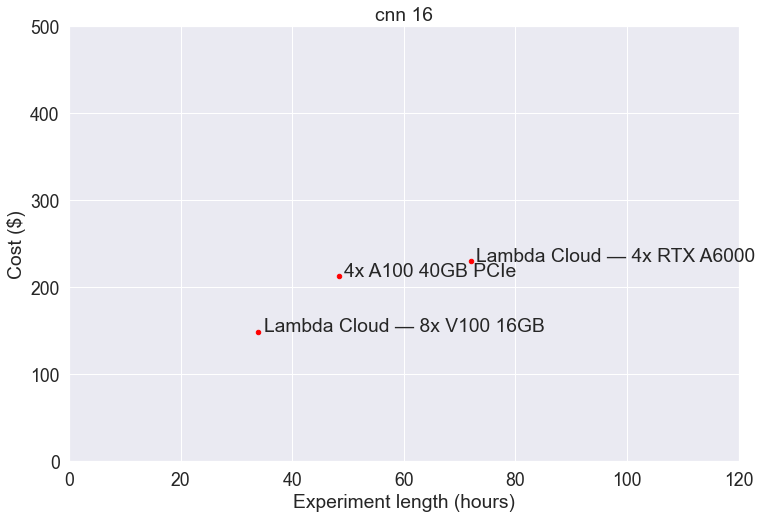

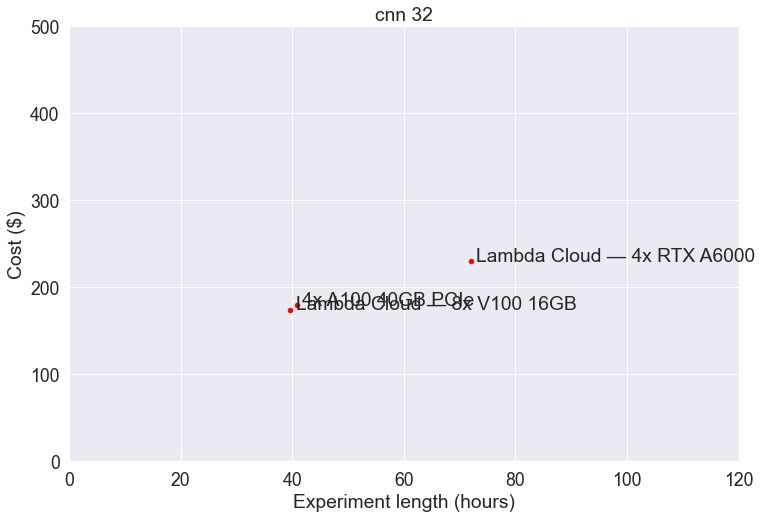

In [32]:
df, *_ = cloud_benchmark_df(
    df_all,
    pd.Series(
        [4.40, 4.40, 3.20],
        ['4x A100 40GB PCIe', 'Lambda Cloud — 8x V100 16GB', 'Lambda Cloud — 4x RTX A6000']
    ),
    'Lambda Cloud — 4x RTX A6000',
    xlim=(0, 120),
    ylim=(0, 500)
)
df

,num_gpu,watt,price,ssd_32,bert_base_squad_32,bert_large_squad_32,gnmt_32,maskrcnn_32,resnet50_32,tacotron2_32,...,tf_num_monthly_experiments_32,cnn_num_monthly_experiments_32,tf_mean_16,tf_speedup_16,cnn_mean_16,cnn_speedup_16,tf_experiment_length_16,cnn_experiment_length_16,tf_num_monthly_experiments_16,cnn_num_monthly_experiments_16
name_gpu,,,,,,,,,,,,,,,,,,,,,
2x RTX 2080Ti,2.0,500.0,3856.0,196.0,49.0,6.0,22863.0,15.0,497.0,16355.0,...,10.000000,10.000000,3663.333333,1.000000,406.666667,1.000000,72.000000,72.000000,10.000000,10.000000
2x RTX 3090,2.0,700.0,6284.0,265.0,126.0,25.0,66714.0,26.0,922.0,38134.0,...,29.750573,17.132768,13929.000000,3.802275,669.000000,1.645082,18.936033,43.766816,38.022748,16.450820
4x RTX A5000,4.0,920.0,11428.0,463.0,281.0,51.0,99794.0,49.0,1600.0,72417.0,...,41.630186,29.830508,25088.666667,6.848590,1204.666667,2.962295,10.513113,24.305479,68.485896,29.622951
2x RTX A4500,2.0,400.0,3856.0,197.0,106.0,19.0,57078.0,22.0,673.0,27066.0,...,22.029779,12.598870,9837.666667,2.685441,517.666667,1.272951,26.811236,56.561494,26.854413,12.729508
4x RTX A4500,4.0,800.0,7712.0,393.0,206.0,37.0,108391.0,43.0,1335.0,52420.0,...,43.985747,25.014124,19651.666667,5.364422,1031.333333,2.536066,13.421762,28.390433,53.644222,25.360656
2x RTX A5500,2.0,460.0,9000.0,242.0,146.0,33.0,76639.0,28.0,828.0,38915.0,...,29.562230,15.508475,13768.333333,3.758417,635.666667,1.563115,19.157003,46.061877,37.584167,15.631148


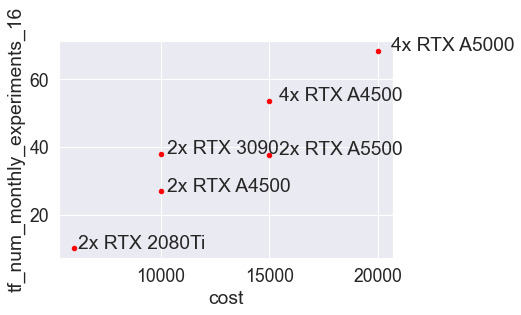

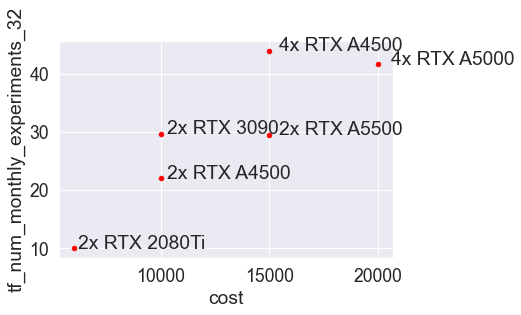

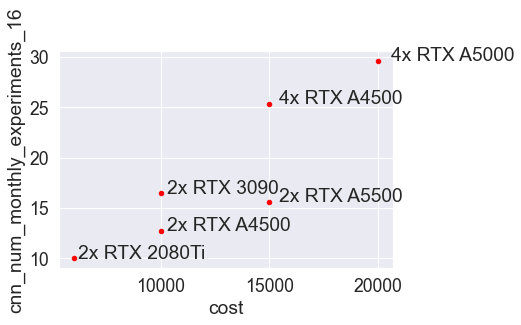

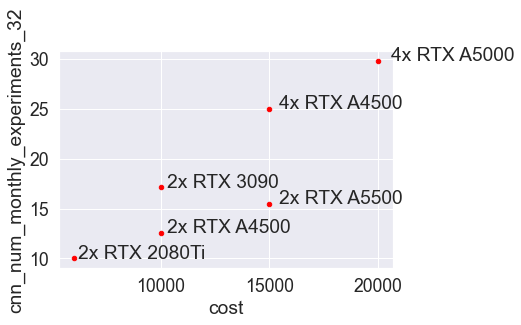

In [36]:
def local_benchmark_df(df: pd.DataFrame, cost: pd.Series, speedup_base: str) -> pd.DataFrame:
    cost.name = 'cost'
    df = df.join(cost).dropna()

    for suffix in ['32', '16']:
        tf_benchmarks = [f'bert_base_squad_{suffix}', f'bert_large_squad_{suffix}', f'transformerxlbase_{suffix}']
        assert not (df[tf_benchmarks] == 0).any().any()
        df[f'tf_mean_{suffix}'] = df[tf_benchmarks].mean(axis=1)
        df[f'tf_speedup_{suffix}'] = df[f'tf_mean_{suffix}'] / df.loc[speedup_base, f'tf_mean_{suffix}']

        cnn_benchmarks = [f'maskrcnn_{suffix}', f'resnet50_{suffix}', f'ssd_{suffix}']
        assert not (df[cnn_benchmarks] == 0).any().any()
        df[f'cnn_mean_{suffix}'] = df[cnn_benchmarks].mean(axis=1)
        df[f'cnn_speedup_{suffix}'] = df[f'cnn_mean_{suffix}'] / df.loc[speedup_base, f'cnn_mean_{suffix}']

        experiment_length_at_base_speedup = 72  # hours
        df[f'tf_experiment_length_{suffix}'] = experiment_length_at_base_speedup / df[f'tf_speedup_{suffix}']
        df[f'cnn_experiment_length_{suffix}'] = experiment_length_at_base_speedup / df[f'cnn_speedup_{suffix}']
        df[f'tf_num_monthly_experiments_{suffix}'] = 30 * 24 / df[f'tf_experiment_length_{suffix}']
        df[f'cnn_num_monthly_experiments_{suffix}'] = 30 * 24 / df[f'cnn_experiment_length_{suffix}']

    def plot_df(df, prefix: str, suffix: str):
        fig, ax = plt.subplots()
        df.plot(x='cost', y=f'{prefix}_num_monthly_experiments_{suffix}', kind='scatter', ax=ax, c='red')
        for k, v in df.iterrows():
            ax.annotate(k, (v['cost'] * 1.03, v[f'{prefix}_num_monthly_experiments_{suffix}']))
        return fig

    #df = df[['tf_speedup_32', 'cnn_speedup_32', 'tf_speedup_16', 'cnn_speedup_16', 'cost']]

    return df, plot_df(df, 'tf', '16'), plot_df(df, 'tf', '32'), plot_df(df, 'cnn', '16'), plot_df(df, 'cnn', '32')

df, *_ = local_benchmark_df(
    df_all,
    pd.Series(
        [6000, 10000, 10000, 15000, 15000, 20000],
        ['2x RTX 2080Ti', '2x RTX 3090', '2x RTX A4500', '2x RTX A5500', '4x RTX A4500', '4x RTX A5000']
    ),
    '2x RTX 2080Ti'
)
df